# 1 Hull-White Multifactor Model Example

## 1.1 Hull White Model

The model state $x(t)$ is $n$ dimensional and driven by $m \leq n$ Brownian motions:

$$
\begin{aligned}
    dx(t) & = & (y(t)  \mathbf{1} - \kappa x(t)) dt + \sigma_x(t)^T dW(t) \\
  f(t,T) & = & f(0,T) + m(t,T)^T \left( x(t) + y(t) \int_t^T m(t,u) du \right) \\
    r(t) & = & f(0,t) + \sum_{i=1}^n x_i(t)

\end{aligned}
$$


with a $n \times n$ diagonal mean reversion matrix

$$
\kappa = \text{diag}(\kappa_1,\ldots,\kappa_n)
$$


and

$$
\begin{aligned}
  H(t)   &=& \text{diag}(h_1(t), \ldots, h_n(t)) \\
  h_i(t) &=& e^{-\int_0^t \kappa_i(s) ds}

\end{aligned}
$$


Furthermore, the volatility $\sigma_x$ is given by the $m \times n$ matrix valued function

$$
\sigma_x(t) = g(t)H(t)
$$


and

$$
\begin{aligned}
  m(t,T) & := & H(T)H(t)^{-1}\mathbf{1} \\
    x(t) & := & H(t) \int_0^t g(s)^Tg(s) \int_s^t h(u) du ds + H(t) z(t) \\
    y(t) & := & H(t) \left( \int_0^t g(s)^T g(s) ds \right) H(t) \\
  z(t) & := & \int_0^t g(s)^T dW(s)

\end{aligned}
$$


The model is fully specified by the mean reversion $\kappa(t)$ and volatility $\sigma_x(t)$, since from that we can
compute $y(t)$ and $M(t,T)$ as

$$
\begin{aligned}
  m(t,T) &=& \left( e^{-\int_t^T \kappa_1(s) ds}, e^{-\int_t^T \kappa_2(s) ds}, \ldots, e^{-\int_t^T \kappa_n(s) ds} \right)^T \\
  M(t,T) &=& \text{diag}(m_1, \ldots, m_n)

\end{aligned}
$$


and

$$
y(t) = \int_0^t M(s,t) \sigma_x(s)^T \sigma_x(s) M(s,t) ds
$$


since $g(s) =\sigma_x(s)H^{-1}(s)$.




## 1.2 PCA on historical Interest Rate Movements

We assume a tenor structure $\tau_1, \ldots, \tau_{N_\tau}$ to discretize a single rate curve, i.e. we choose one currency and one
representative curve in that currency. We have continuously compounded forward yields

$$
f_j = \frac{-\log \left( \frac{P(0, \tau_j)}{P(0, \tau_{j-1})} \right)}{ \tau_j - \tau_{j-1} }
$$


for $j=1,\ldots,N_\tau$, where we set $\tau_0 := 0$. Let $\Sigma_r$ denote an estimate of the covariance matrix of
absolute daily returns $r_j(t) := f_j(t) - f_j(t-1)$ sourced from time series data. We assume that the mean of these
returns is approximately zero. We furthermore assume that $\Sigma_r$ is normalized to {\em annual volatilities}.

Spectral decomposition (PCA) yields a orthogonal coordinate transform $\Gamma$

$$
\Sigma_r = \Gamma \Lambda \Gamma^T
$$


with $\Lambda = \text{diag}(\lambda_1, \ldots, \lambda_{N_\tau})$ a diagonal matrix containing the eigenvalues of
$\Sigma_r$ and the columns of $\Gamma$ being the eigenvectors of $\Sigma_r$ with norm 1. We can assume that the columns
of $\Gamma$ are sorted in a way that $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_{N_\tau}$.

$\Gamma$ defines a linear coordinate transform

$$
\begin{aligned}
r^* = \Gamma^T r \\
r = \Gamma r^*
\end{aligned}
$$


translating the original returns $r$ to (independent) returns $r^*$ in terms of the principal component coordinates and
vice versa. The $j$th eigenvector $\gamma_j$ of $\Gamma$ is also called the jth vector of {\em loadings} and translates
a return $(0,\ldots,0,1,0,\ldots,0)^T$ in new coordinates with $1$ at the $j$th component to the corresponding return in
original coordinates

$$
\begin{aligned}
  r = \gamma_j = \Gamma \begin{pmatrix}
    0 \\
    \ldots \\
    0 \\
    1 \\
    0 \\
    \ldots \\
    0
    \end{pmatrix}

\end{aligned}
$$


We now pick a number $m \leq N_\tau$ and only keep the components $1,\ldots,m$ of $\Gamma$.





## 1.3 Statistical Interest Rate Model

We follow Andersen, L., and Piterbarg, V. (2010): Interest Rate Modeling, Volume I-III, chapter 12.1.5 "Multi-Factor
Statistical Gaussian Model" to calibrate the diffusion and reversion matrices to the prescribed components and
volatilities. We do not go into much detail here and refer the interested reader to the given reference.

In the interest rate model we aim to develop in this section the $j$th principal component is driven by $z_j$ with

$$
dz_j = \sigma_j(t) dW_j(t)
$$


with $j=1,\ldots,m$. If we wish to derive $\sigma_j(t)$ from historical time series data, we set

$$
\sigma_j(t) \equiv \sqrt{\lambda_j}
$$


independent of $t$. Alternatively, we can leave $\sigma_j(t)$ unspecified at this point and calibrate to market option
quotes after having specified the reversion parameters of the model. To connect the loadings $\gamma_j$ with the mean
reversion parameters of the model we consider the model specified by Andersen/Piterbarg formula (12.35)

$$
df(t, t+\tau) = O(dt) + \sum_{j=1}^m l_j(\tau)dz_j(t)
$$


with

$$
l_j(\tau) = \sum_{i=1}^{n_j} v_{j,i} e^{-\kappa_{j,i} \tau}
$$


First we have to integrate over $\tau$ to translate the loadings $l_j(\tau)$ for the instantaneous
forward rate at $t+\tau$ as seen from $t$ to loadings $l_j'(k)$ of the continuously compounded forward yield $f_j$ in
\ref{cont_comp_forward}. This means we have to compute

$$
l_j'(k) = \frac{1}{\tau_k - \tau_{k-1}} \int_{\tau_{k-1}}^{\tau_k} l_j(\tau) d \tau = \sum_{i=1}^{n_j} \frac{v_{j,i} }{\tau_k - \tau_{k-1}} \int_{\tau_{k-1}}^{\tau_k} e^{-\kappa_{j,i} \tau} d \tau
$$


for $k=1,\ldots,N_{\tau}$. This is

$$
l_j'(k) = \sum_{i=1}^{n_j} v_{j,i} \frac{e^{-\kappa_{j,i} \tau_{k-1}} - e^{-\kappa_{j,i} \tau_k}}{\kappa_{j,i}( \tau_k - \tau_{k-1} )}
$$


The next step is to determine the parameters $v_{j,i}$ and $\kappa_{j,i}$ such that the model implied loadings $l'_j(k)$
match the loadings $\gamma_j$ from the PCA as closely as possible:

$$
l_j' \approx \gamma_j
$$


Here, the parameter $n_j$ is the number of ``basis functions'' available to approximate $\gamma_j$. We specify $n_j$ as
a fixed external parameter, while $v_{j,i}$ and $\kappa_{j,i}$ have to be determined in an numerical optimization
procedure. Notice that the total number of state variables in the final model will be $n = \sum_{j=1}^m n_j$ and the
numerical optimization will be run over $2n$ free parameters, i.e. there is a trade off between the accuracy of the
approximation of the PCA loadings and the number of state variables in the model. Also notice that the number of driving
Brownian motions in the model will be $m$.



## 1.3 Statistical Interest Rate Model (continued)

Andersen/Piterbarg, proposition 12.15 summarizes the model dynamics we arrive at. The short rate is given by

$$
r(t) = f(0,t) + (1,1,\ldots,1) x(t)
$$


where the driving vector $x(t)$ of size $n$ follows the dynamics

$$
dx(t) = (y(t) (1,1,\ldots,1)^T - \kappa x(t)) dt + \sigma_x(t)^T dW(t)
$$


with an m-dimensional vector $W(t)$ of independent Brownian motions, a diagonal $n \times n$ mean reversion matrix
$\kappa$

$$
\kappa = \text{diag}( \kappa_{1,1}, \ldots, \kappa_{1,n_1}, \ldots, \kappa_{m,1}, \ldots, \kappa_{m,n_m} )
$$


containing the calibrated mean reversion parameters, a diagonal $n \times n$ matrix
$\sigma$

$$
\sigma = \text{diag}( \sigma_{1}, \ldots, \sigma_{1}, \ldots, \sigma_{m}, \ldots, \sigma_{m} )
$$


containing the historical volatilities of the $m$ factors or unspecified values to be
calibrated to market option quotes, a column vector $h$ of size $n$

$$
h(t) = ( e^{-\kappa_{1,1}t}, \ldots, e^{-\kappa_{1,n_1}}, \ldots, e^{-\kappa_{m,1}}, \ldots, e^{-\kappa_{m,n_m}} )^T
$$


The $m \times n$ matrix $\sigma_x$ is given by

$$
\sigma_x(t) = v \sigma(t)
$$


where $v$ is a $m \times n$ matrix containing the calibrated parameters in the following form

$$
v = \begin{pmatrix}
       v_{1,1} & \ldots & v_{1,n_1} & 0      & \ldots & 0        & \ldots & 0      & \ldots & 0 \\
       0      & \ldots & 0        & v_{2,1} & \ldots & v_{2,n_2} & \ldots & \vdots & \vdots & \vdots \\
       \vdots & \ddots & \vdots   & \vdots & \ddots & \vdots   & \ddots & 0      & \vdots & 0 \\
       0      & \ldots & 0        & 0      & \ldots & 0        & \ldots & v_{m,1} & \ldots & v_{m,n_m}
       \end{pmatrix}
$$


The $n \times n$ matrix $y$ is given by

$$
y(t) = H(t) \left( \int_0^t H(s)^{-1} \sigma(s) v^T v \sigma(s) H(s)^{-1} ds \right) H(t)
$$


where $H(t)$ is the diagonal $n \times n$ matrix $\text{diag}(h_1(t), \ldots, h_n(t))$. This model is a special form of
the model described above with the parameter $g$ set to

$$
g(t) = v \sigma(t) H(t)^{-1}
$$



## 1.4 Toy Model: Prescribed Principal Components and Volatilities and calibrated model parameters

We prescribe two artificial principal components for the movement of zero rates:

- a parallel movement
- a rotation around the 7y points

with volatilities 0.0070 and 0.0030. It turns out that 2 basis functions are sufficient to get a decent fit, i.e. we have $n_1=n_2=2$ and $m=2$. In other words we have $2$ driving Brownian motions and $4$ states in total. The calibrated mean reversion matrix is

$$
\kappa = \begin{pmatrix}
  -0.000000048673 & 0 & 0 & 0 \\
  0 & -0.24532070948 & 0 & 0 \\
  0 & 0 & -0.056427887126 & 0 \\
  0 & 0 & 0 & 0.510590372873
  \end{pmatrix}
$$


and the calibrated diffusion matrix is

$$
\sigma_x = \begin{pmatrix}
  0.002474873734151 & 0 & 0 & 0 \\
  0 & 0 & 0.000706612189017 & -0.00298902380928
  \end{pmatrix}
$$



# 2 Rountrip test in VRE

The example generates a single monte carlo path with 5000 daily steps and outputs the generated scenarios in
scenariodump.csv.


In [1]:
from VRE import *
import sys, time, math
sys.path.append('..')
import utilities
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [2]:
params = Parameters()
params.fromFile("Input/vre.xml")
vre = VREApp(params, False)

In [3]:
vre.run()
errors = vre.getErrors()
print ("Completed with", len(errors), "errors/warnings")
if len(errors) > 0:
    for e in errors:
       print(e)
print ("Run time: %.4f sec" % vre.getRunTime())        

Completed with 0 errors/warnings
Run time: 0.2000 sec


We now perform a pricinpal component analysis on the generated data and compare the result to the calibrated input princial component functions.

In [4]:
# these must match the yield curve tenors in simulation.xml
curve_times = [1, 2, 3, 5, 10, 15, 20, 30]

# load the scenariodump.csv into a dataframe
data = pd.read_csv('Output/scenariodump.csv')

# just keep the discount factors
data = data.iloc[:, 3:]

# convert to zero rates
data = -np.log(data).div(curve_times)

# take differences
data = data.diff().iloc[1:,:]

# subtract the means
data = data - data.mean()

# build the covariance matrix
cov = 252.0 / len(data) * np.dot(data.T, data)

# get the eigne vectors and values
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [5]:
inputevs = pd.read_csv('Input/inputeigenvectors.csv')

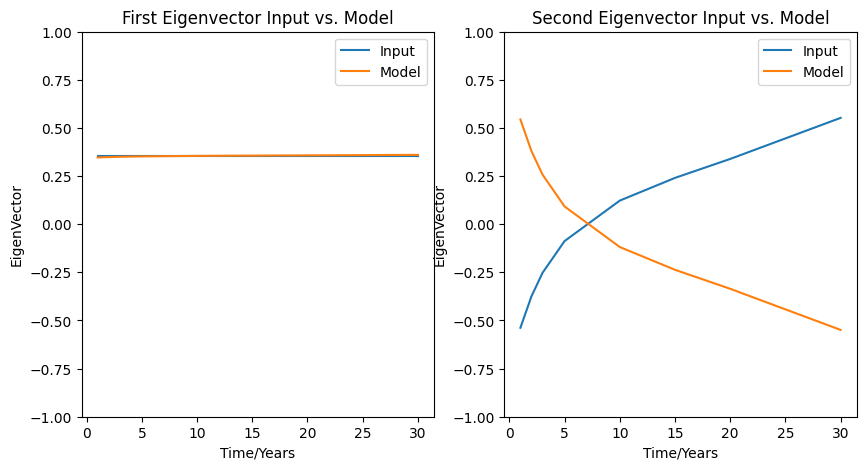

In [6]:
fig = plt.figure(figsize=(10, 5))
gs = plt.GridSpec(nrows=1, ncols=2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax1.set_ylim([-1, 1])
ax2.set_ylim([-1, 1])

ax1.plot(inputevs['tenor'], inputevs['eigenvector_1'], label='Input')
ax1.plot(curve_times, eigenvectors[:,0], label='Model')
ax1.set(xlabel='Time/Years')
ax1.set(ylabel='EigenVector')
ax1.set_title('First Eigenvector Input vs. Model')
ax1.legend()

ax2.plot(inputevs['tenor'], inputevs['eigenvector_2'], label='Input')
ax2.plot(curve_times, eigenvectors[:,1], label='Model')
ax2.set(xlabel='Time/Years')
ax2.set(ylabel='EigenVector')
ax2.set_title('Second Eigenvector Input vs. Model')
ax2.legend()

plt.show()

Finally we compare the volatilities of the generated principal components:

In [7]:
 np. sqrt(eigenvalues)

array([7.01034497e-03, 2.97437013e-03, 2.41364049e-05, 1.45941592e-05,
       9.62024633e-06, 3.29564200e-06, 2.91183733e-07, 9.87151499e-07])